In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading transformed data from task-1


In [3]:
df_trans= pd.read_csv("/content/drive/MyDrive/week 1/transformed_raw.csv")
df_trans.head()

,Unnamed: 0,headline,url,publisher,date,stock,datetime,sentiment_score,sentiment,tokens,topic
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,2020-06-05 14:30:54+00:00,0.000,Neutral,"['Stocks', 'That', 'Hit', 'Week', 'Highs', 'On...",2
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,2020-06-03 14:45:20+00:00,0.000,Neutral,"['Stocks', 'That', 'Hit', 'Week', 'Highs', 'On...",2
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,2020-05-26 08:30:07+00:00,0.000,Neutral,"['Biggest', 'Movers', 'From', 'Friday']",4
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,2020-05-22 16:45:06+00:00,0.000,Neutral,"['Stocks', 'Moving', 'In', 'Fridays', 'MidDay'...",2
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,2020-05-22 15:38:59+00:00,0.296,Positive,"['B', 'A', 'Securities', 'Maintains', 'Neutral...",3


In [2]:
df_apple = pd.read_csv('C:\\Users\\Aman\\Desktop\\kifyaw1\\yfinance_data\\AAPL_historical_data.csv')
df_apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [3]:
def change_to_datetime(df, column):
  """To covert an object to datetime dtype
  takes data framw and column name to be converted """

  df[column] = pd.to_datetime(df[column])
  return df

df_apple= change_to_datetime(df_apple,"Date")
df_apple.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998 entries, 0 to 10997
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          10998 non-null  datetime64[ns]
 1   Open          10998 non-null  float64       
 2   High          10998 non-null  float64       
 3   Low           10998 non-null  float64       
 4   Close         10998 non-null  float64       
 5   Adj Close     10998 non-null  float64       
 6   Volume        10998 non-null  int64         
 7   Dividends     10998 non-null  float64       
 8   Stock Splits  10998 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 773.4 KB


In [4]:
import talib

talib.__version__

'0.4.32'

In [5]:
df_apple['SMA_20'] = talib.SMA(df_apple['Close'], timeperiod=20)
df_apple['EMA_20'] = talib.EMA(df_apple['Close'], timeperiod=20)
df_apple['RSI'] = talib.RSI(df_apple['Close'], timeperiod=14)

df_apple['MACD'], df_apple['Signal'], df_apple['Hist'] = talib.MACD(
    df_apple['Close'], fastperiod=12, slowperiod=26, signalperiod=9
)

df_apple['ADX'] = talib.ADX(df_apple['High'], df_apple['Low'], df_apple['Close'], timeperiod=14)

df_apple['SlowK'], df_apple['SlowD'] = talib.STOCH(
    df_apple['High'], df_apple['Low'], df_apple['Close'],
    fastk_period=14, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)

df_apple['Upper_Band'], df_apple['Middle_Band'], df_apple['Lower_Band'] = talib.BBANDS(
    df_apple['Close'], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)

df_apple['ATR'] = talib.ATR(df_apple['High'], df_apple['Low'], df_apple['Close'], timeperiod=14)

df_apple['OBV'] = talib.OBV(df_apple['Close'], df_apple['Volume'])

df_apple['AD'] = talib.AD(df_apple['High'], df_apple['Low'], df_apple['Close'], df_apple['Volume'])









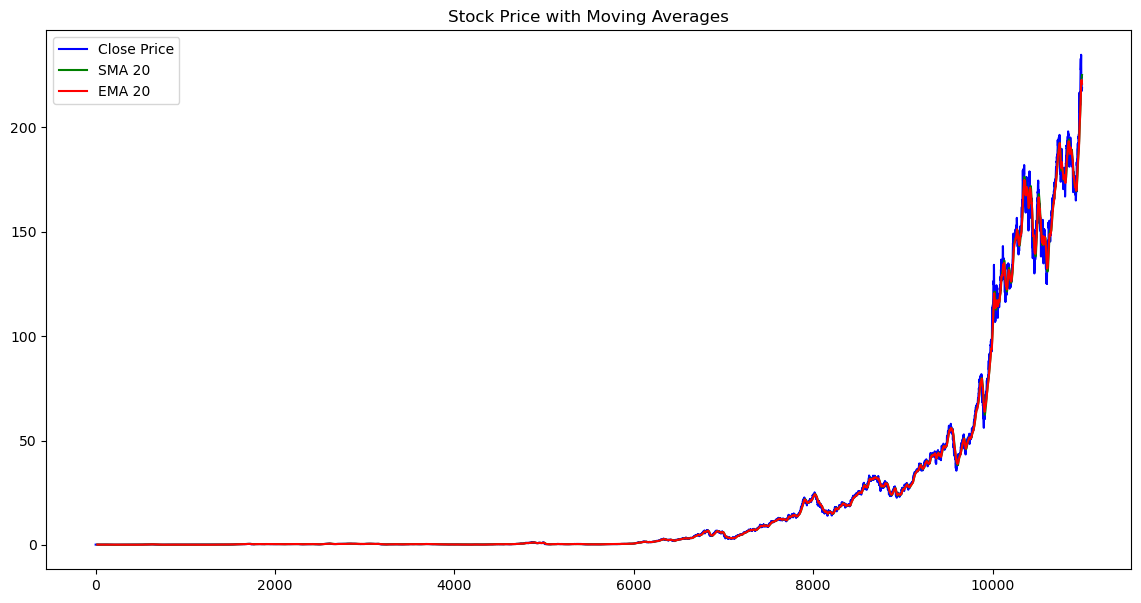

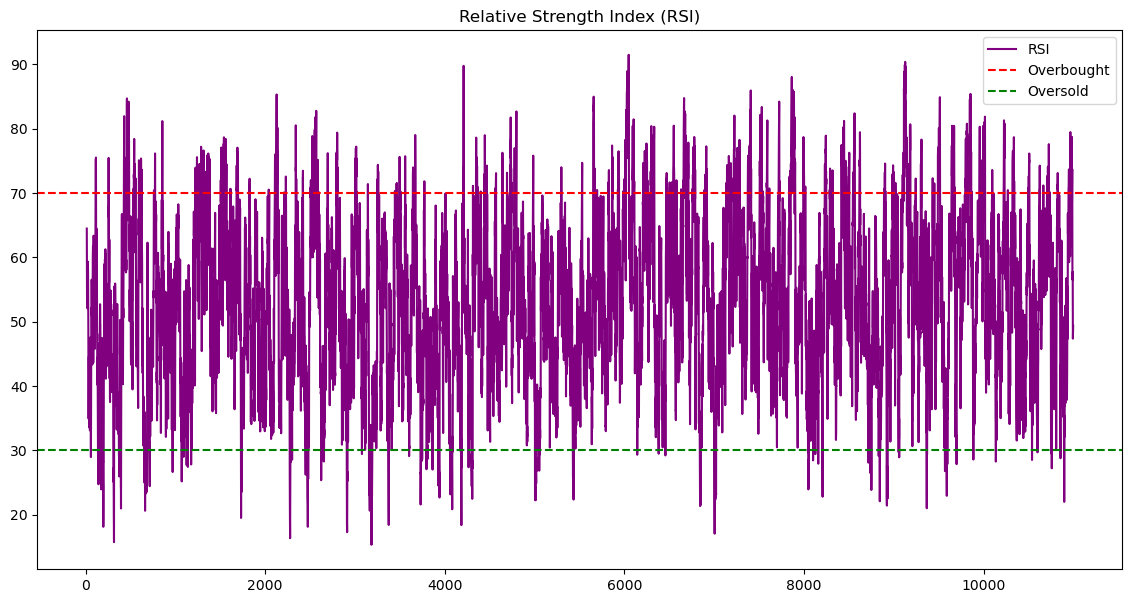

In [6]:

# Plot Close Price with SMA and EMA
plt.figure(figsize=(14, 7))
plt.plot(df_apple['Close'], label='Close Price', color='blue')
plt.plot(df_apple['SMA_20'], label='SMA 20', color='green')
plt.plot(df_apple['EMA_20'], label='EMA 20', color='red')
plt.title('Stock Price with Moving Averages')
plt.legend()
plt.show()

# Plot RSI
plt.figure(figsize=(14, 7))
plt.plot(df_apple['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='green', linestyle='--', label='Oversold')
plt.title('Relative Strength Index (RSI)')
plt.legend()
plt.show()


c:\Users\Aman\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


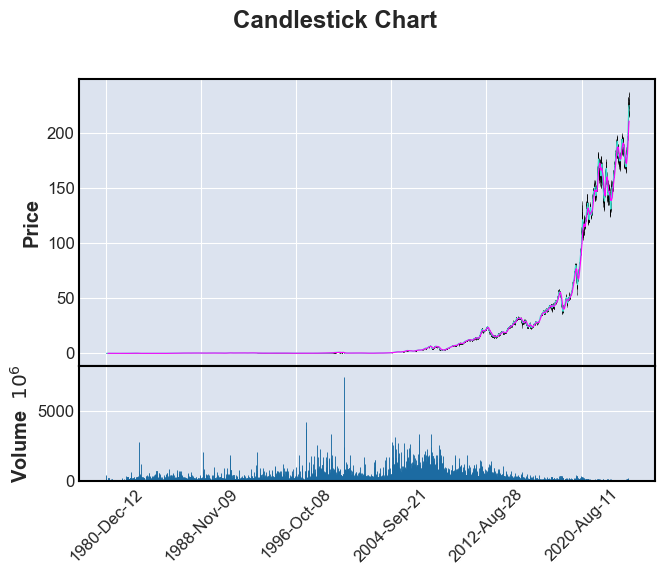

In [8]:
import mplfinance as mpf

mpf.plot(df_apple.set_index(df_apple['Date']), type='candle', mav=(20, 50), volume=True, title='Candlestick Chart')


Strtegy Backtesting

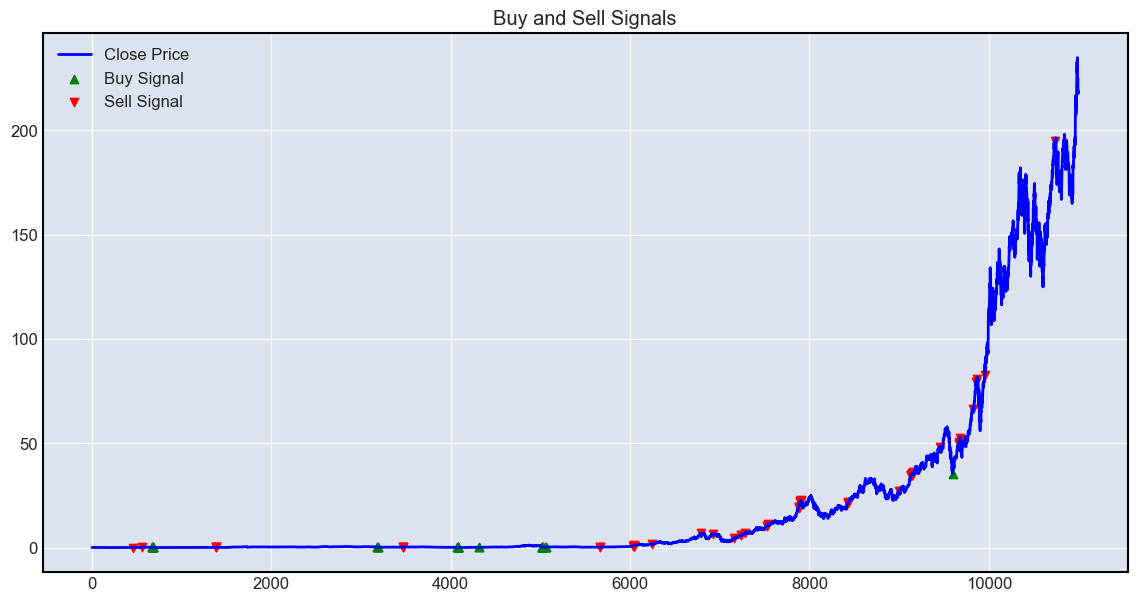

In [9]:
df_apple['Buy_Signal'] = (df_apple['RSI'] < 30) & (df_apple['MACD'] > df_apple['Signal'])
df_apple['Sell_Signal'] = (df_apple['RSI'] > 70) & (df_apple['MACD'] < df_apple['Signal'])

# Plot signals
plt.figure(figsize=(14, 7))
plt.plot(df_apple['Close'], label='Close Price', color='blue')
plt.scatter(df_apple.index[df_apple['Buy_Signal']], df_apple['Close'][df_apple['Buy_Signal']], label='Buy Signal', marker='^', color='green')
plt.scatter(df_apple.index[df_apple['Sell_Signal']], df_apple['Close'][df_apple['Sell_Signal']], label='Sell Signal', marker='v', color='red')
plt.legend()
plt.title('Buy and Sell Signals')
plt.show()


Stastical Analysis

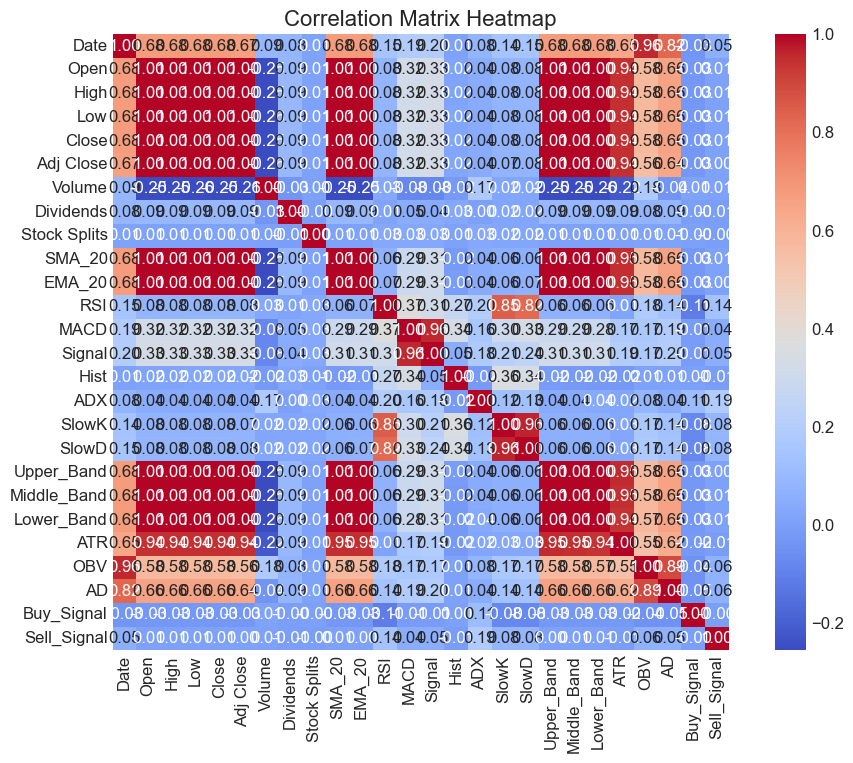

In [ ]:

corr_matrix = df_apple[[]].corr()

plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)

# Add title
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()